In [6]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/holo_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/dirac_spinors.jl")

dirac_analytic_origin_3pbc (generic function with 1 method)

In [7]:
# lattice parameters
pd = 50
kappa = 10
m_kappa = 10^(-1) * kappa
w = 10^(-1) * m_kappa

0.1

In [8]:
# RMG parameters
a = 4*pi/(3*kappa)
uD = 10
t0 = 3
t1 = 5
t2 = -0.21
t3 = 0
t4 = 0
Nl = 1
index = 1

1

In [9]:
# Dirac parameters
v = 1
m = 5

5

In [10]:
# 3-Patch parameters
vF = 0
delta = -1

-1

<font size="12">Spacing Convergence</font>

In [11]:
function spacing_conv(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m)
    n_pts = 10^3
    spinor_labels = ["Holomorphic", "RMG", "Dirac"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 0
    y = 0
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(900 * length(spinor_labels), 700 * length(spinor_labels)), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(-0, 3, n_pts)
    spacings[2, :] = range(0, 3, n_pts)
    spacings[3, :] = range(0, 3, n_pts)


    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
        # holomorphic spinors
        holo_s = (w / 2 / pd) / exps[1, i]

        holo_qm = holo_quantum_metric(grid, holo_s, Nl)

        geometric_quants[1, 1, i] = holo_spinor_bc(grid, holo_s, Nl)[1]
        geometric_quants[1, 2, i] = holo_qm[1, 1] + holo_qm[4, 1]
        # geometric_quants[1, 3, i] = holo_qm[1, 1] * holo_qm[4, 1] - holo_qm[2, 1] * holo_qm[3, 1]

        # RMG spinors
        kappa = 4*pi/(3 * a)
        rmg_grid = reshape([kappa, 0] + [x, y], (1, 2))
        rmg_s = (w / 2 / pd) / exps[2, i]

        rmg_qm = rmg_quantum_metric(rmg_grid, rmg_s, a, uD, t0, t1, t2, t3, t4, Nl, index)

        geometric_quants[2, 1, i] = rmg_spinor_bc(rmg_grid, rmg_s, a, uD, t0, t1, t2, t3, t4, Nl, index)[1]
        geometric_quants[2, 2, i] = rmg_qm[1, 1] + rmg_qm[4, 1]
        # geometric_quants[2, 3, i] = rmg_qm[1, 1] * rmg_qm[4, 1] - rmg_qm[2, 1] * rmg_qm[3, 1]

         # Dirac spinors
         dirac_s = (w / 2 / pd) / exps[3, i]
 
         dirac_qm = dirac_quantum_metric(grid, dirac_s, v, m, index)
 
         geometric_quants[3, 1, i] = dirac_spinor_bc(grid, dirac_s, v, m, index)[1]
         geometric_quants[3, 2, i] = dirac_qm[1, 1] + dirac_qm[4, 1]
         # println(dirac_qm[1, 1] + dirac_qm[4, 1])
    end

    for j in 1:length(spinor_labels)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :])
        
        ax2 = Axis(P[2, j], xlabel = L"\frac{1}{spacing}", ylabel = L"Tr[g_{\mu \nu} (0, 0)]", title = L"\frac{1}{spacing} \text{ vs } Tr[g_{\mu \nu} (0, 0)]", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, spacings[j, :], geometric_quants[j, 2, :])

        # ax3 = Axis(P[3, j], xlabel = L"\frac{1}{spacing}", ylabel = L"Det[g_{\mu \nu} (0, 0)]", title = L"\frac{1}{spacing} \text{ vs } Det[g_{\mu \nu} (0, 0)]", 
        # titlefont = :regular, titlegap = 20)
        # lines!(ax3, spacings[j, :], geometric_quants[j, 3, :])
    end
    P
end

spacing_conv (generic function with 1 method)

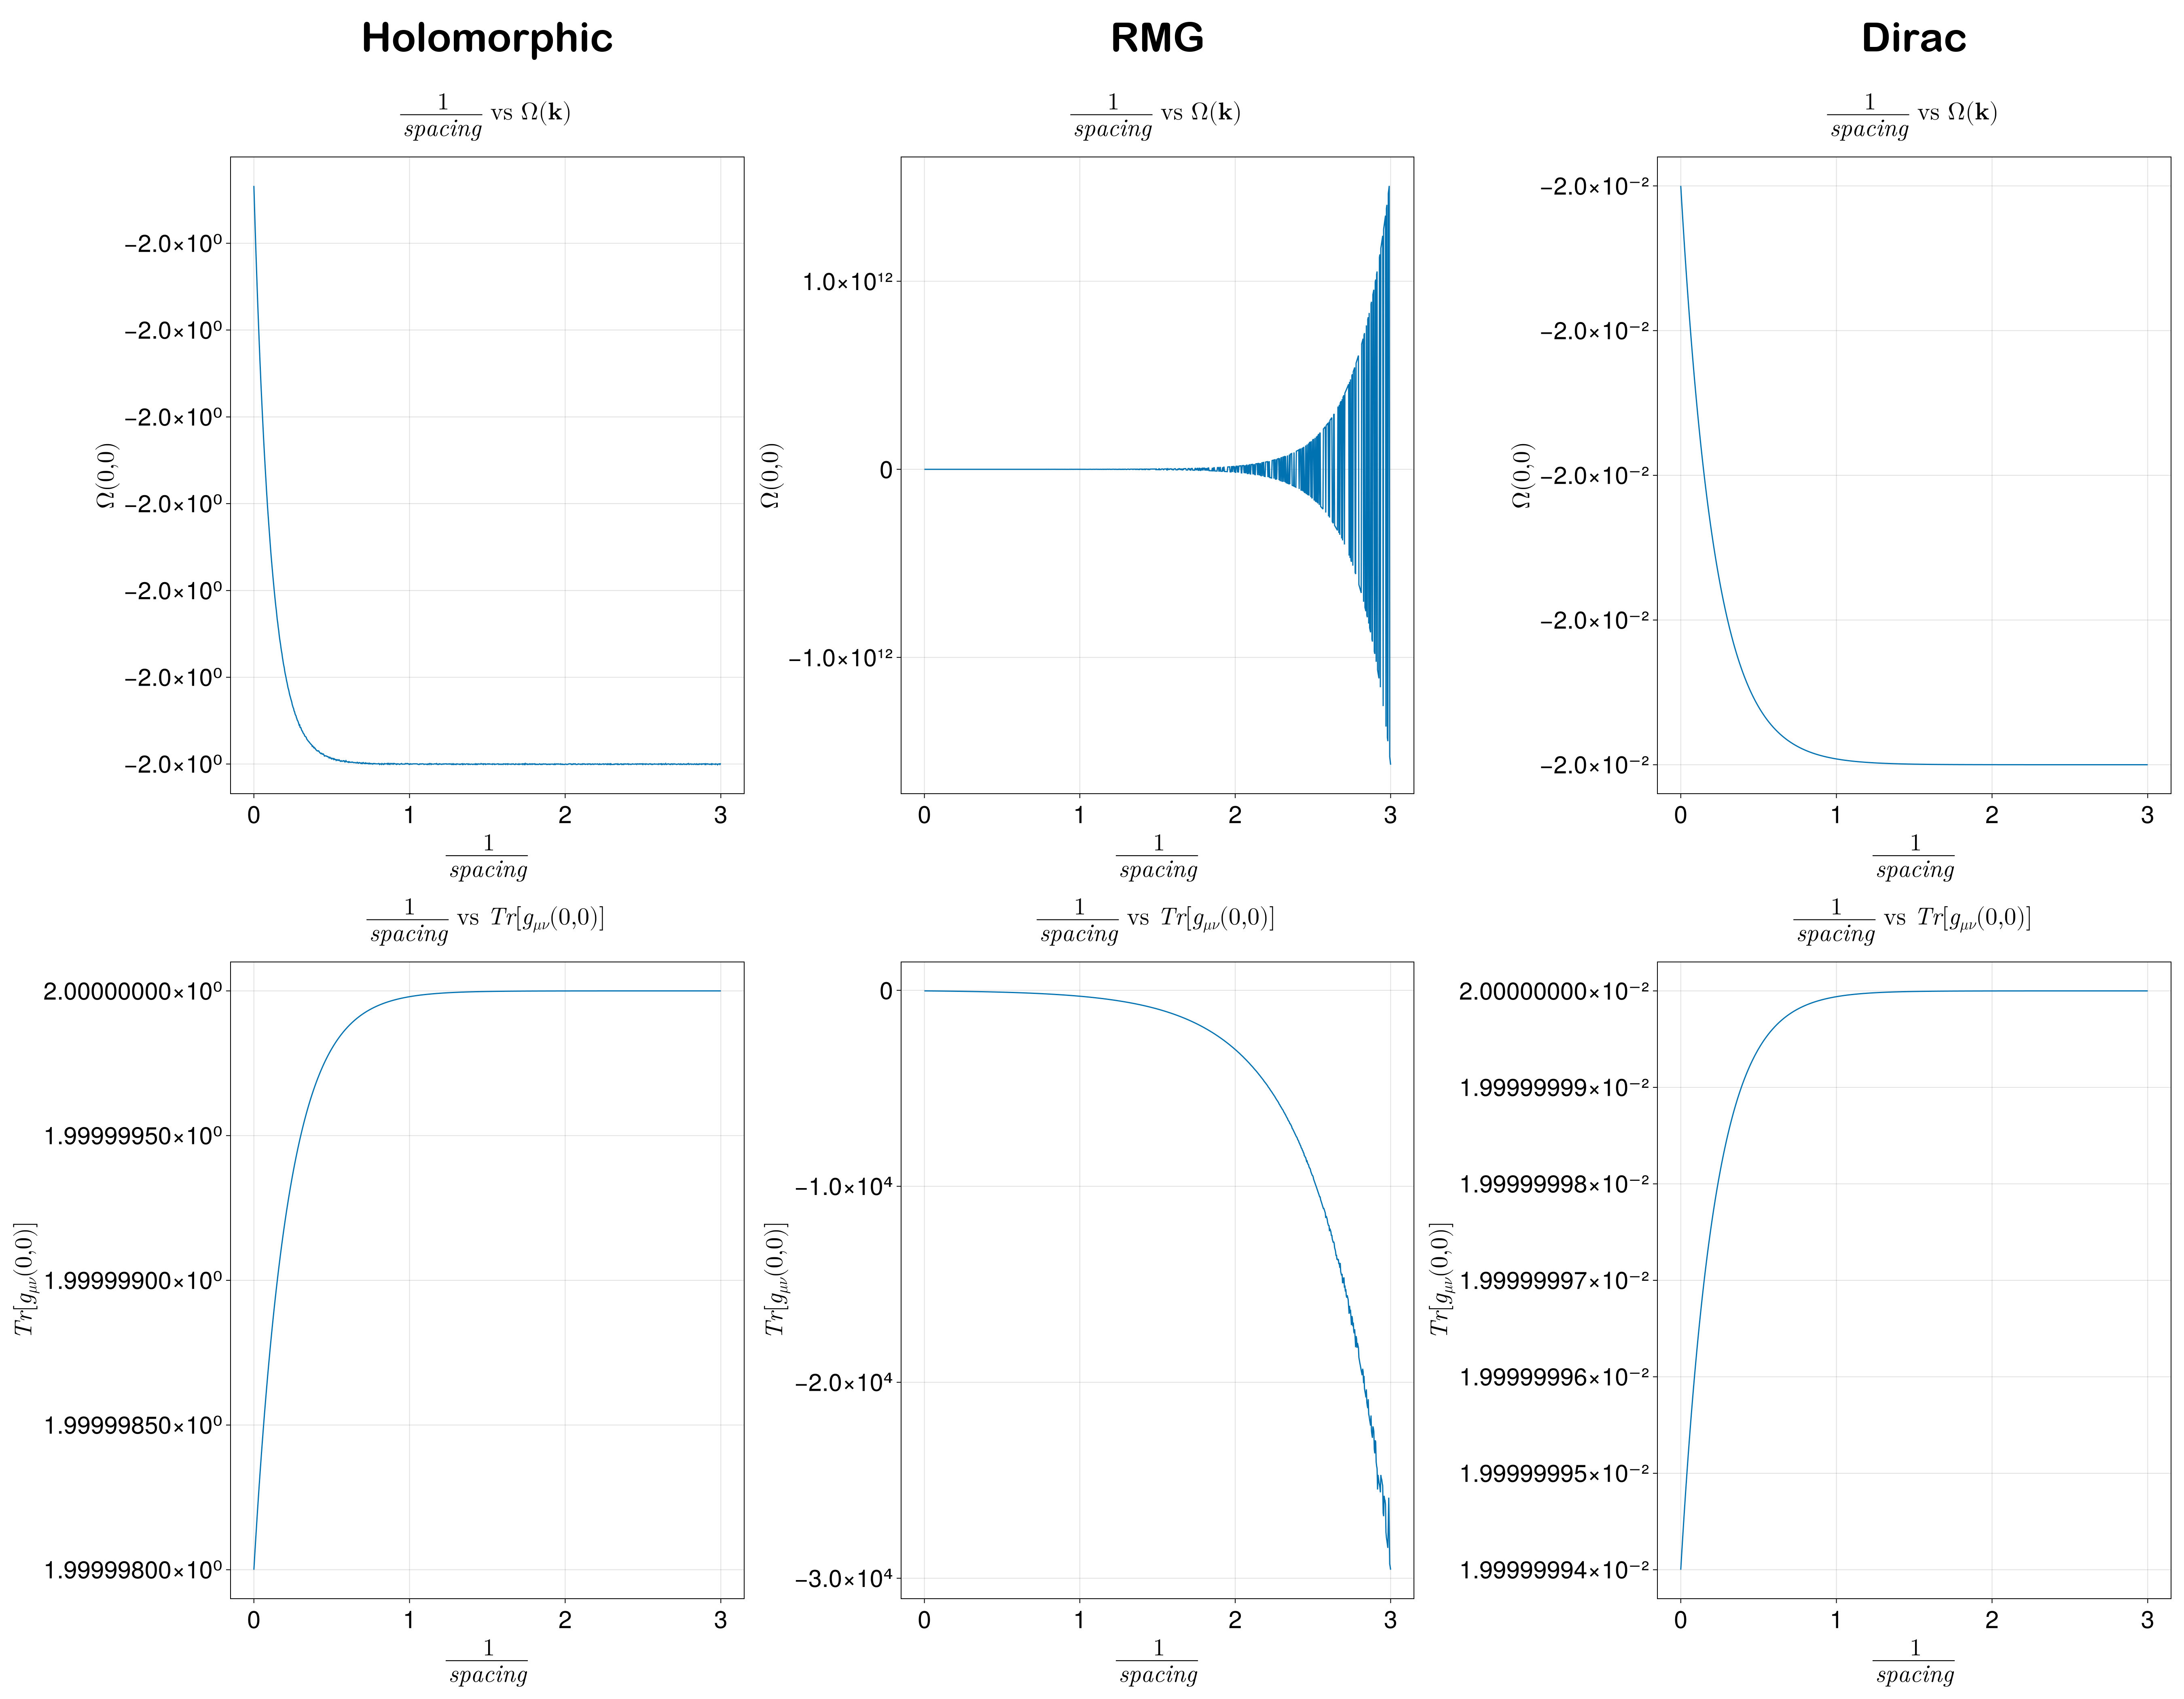

In [12]:
spacing_conv(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m)

<font size="12">3-Patch Spacing Convergence</font>

In [13]:
function patch_spacing_conv(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha, v, m)
    n_pts = 10^3
    spinor_labels = ["Holomorphic", "Dirac", "RMG"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    x = 10^(-12)
    y = 10^(-12)
    grid = reshape([x, y], (1, 2))
    P = Figure(size=(2300, 600 * length(spinor_labels)), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    spacings = Array{Float64}(undef, length(spinor_labels), n_pts)
    spacings[1, :] = range(1, 3, n_pts)
    spacings[2, :] = range(0, 3, n_pts)
    spacings[3, :] = range(0, 3, n_pts)
    #spacings[2, :] = range(-4, -2, n_pts)

    exps = Array{Float64}(undef, length(spinor_labels), n_pts)
    for j in 1:length(spinor_labels)
        exps[j, :] = 10 .^spacings[j, :]
    end

    for i in 1:n_pts
        # holomorphic spinors
        holo_s = (w / 2 / pd) / exps[1, i]

        holo_qm = holo_patch_qm(grid, holo_s, Nl, m_kappa, vF, delta, alpha)

        geometric_quants[1, 1, i] = holo_patch_bc(grid, holo_s, Nl, m_kappa, vF, delta, alpha)[1]
        geometric_quants[1, 2, i] = holo_qm[1, 1] + holo_qm[4, 1]
        # geometric_quants[1, 3, i] = holo_qm[1, 1] * holo_qm[4, 1] - holo_qm[2, 1] * holo_qm[3, 1]

        # Dirac spinors
        dirac_s = (w / 2 / pd) / exps[2, i]

        dirac_qm = dirac_patch_qm(grid, dirac_s, v, m, index, m_kappa, vF, delta, alpha)

        geometric_quants[2, 1, i] = dirac_patch_bc(grid, dirac_s, v, m, index, m_kappa, vF, delta, alpha)[1]
        geometric_quants[2, 2, i] = dirac_qm[1, 1] + dirac_qm[4, 1]

        # RMG spinors
        rmg_s = (w / 2 / pd) / exps[3, i]

        rmg_qm = rmg_patch_qm(grid, rmg_s, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)

        geometric_quants[3, 1, i] = rmg_patch_bc(grid, rmg_s, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)[1]
        geometric_quants[3, 2, i] = rmg_qm[1, 1] + rmg_qm[4, 1]
        # geometric_quants[3, 3, i] = rmg_qm[1, 1] * rmg_qm[4, 1] - rmg_qm[2, 1] * rmg_qm[3, 1]
    end

    for j in 1:3
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 120, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)

        ax1 = Axis(P[1, j], xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)", title = L"\frac{1}{spacing} \text{ vs } \Omega (\textbf{k})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, spacings[j, :], geometric_quants[j, 1, :])
        
        ax2 = Axis(P[2, j], xlabel = L"\frac{1}{spacing}", ylabel = L"Tr[g_{\mu \nu} (0, 0)]", title = L"\frac{1}{spacing} \text{ vs } Tr[g_{\mu \nu} (0, 0)]", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, spacings[j, :], geometric_quants[j, 2, :])

        # ax3 = Axis(P[3, j], xlabel = L"\frac{1}{spacing}", ylabel = L"Det[g_{\mu \nu} (0, 0)]", title = L"\frac{1}{spacing} \text{ vs } Det[g_{\mu \nu} (0, 0)]", 
        # titlefont = :regular, titlegap = 20)
        # lines!(ax3, spacings[j, :], geometric_quants[j, 3, :])
    end
    P
end

patch_spacing_conv (generic function with 1 method)

In [14]:
alpha = 1im

0 + 1im

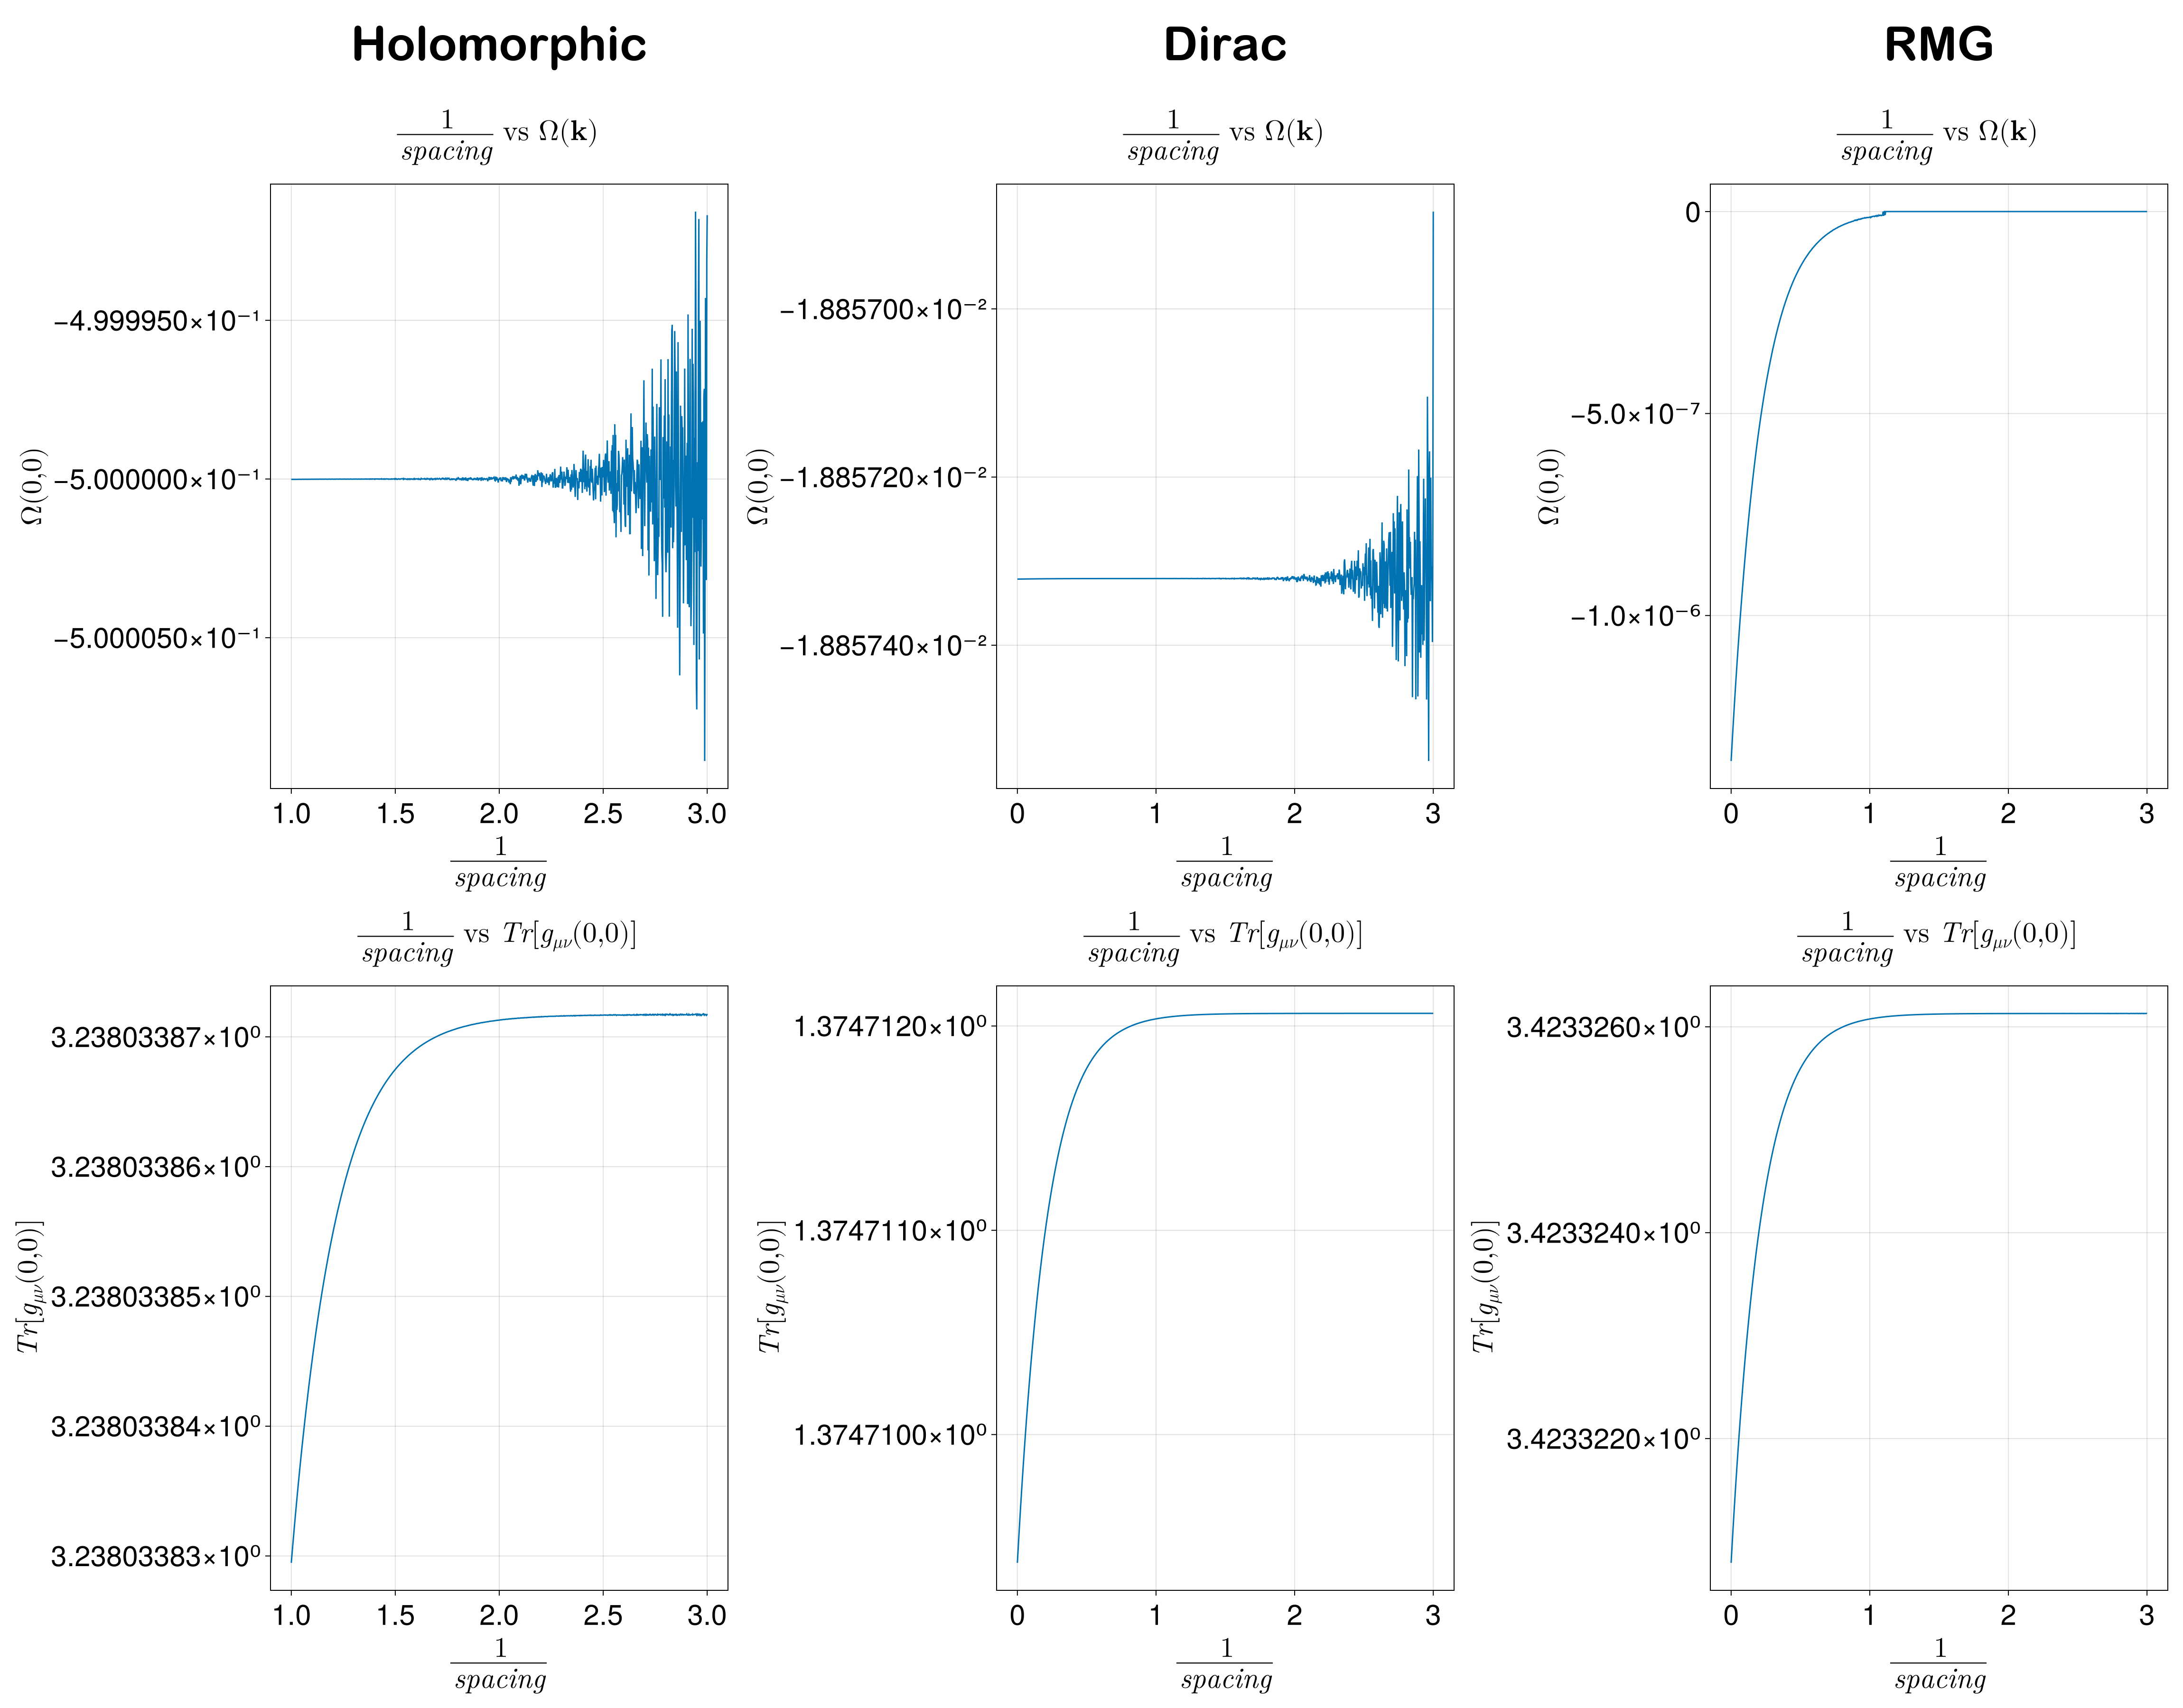

In [15]:
patch_spacing_conv(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha, v, m)

<font size="12">QGT Distributions</font>

In [16]:
m = 5

5

In [17]:
function qgt_distro(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m)
    grid = make_hex([10^(-16), 10^(-16)], w / 2, w / 2 / pd)

    # holomorphic spinors
    holo_spacing = 10^(-2) * (w / 2 / pd)

    fig = Figure(size=(3900, 2600), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    curvatures = holo_spinor_bc(grid, holo_spacing, Nl)
    g_metric = holo_quantum_metric(grid, holo_spacing, Nl)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 1], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[2, 1], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 2], tr3)

    # ax3 = Axis(fig[3, 1], title = L"\text{Det}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    # tricontourf!(ax3, grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # cb3 = Colorbar(fig[3, 2], tr3)

    major_ax1 = Axis(fig[:, 1], title = "Holomorphic", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)


    # RMG spinors
    kappa = 4*pi/(3*a)
    rmg_grid = make_hex([kappa, 0], w / 2, w / 2 / pd)
    rmg_bc_spacing = 10^(-2) * (w / 2 / pd)
    rmg_qm_spacing = 10^(-2) * (w / 2 / pd)

    curvatures = rmg_spinor_bc(rmg_grid, rmg_bc_spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)
    g_metric = rmg_quantum_metric(rmg_grid, rmg_qm_spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 3], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 4], tr1)

    ax2 = Axis(fig[2, 3], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 4], tr3)

    # ax3 = Axis(fig[3, 3], title = L"\text{Det}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    # tricontourf!(ax3, grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # cb3 = Colorbar(fig[3, 4], tr3)

    major_ax1 = Axis(fig[:, 3], title = "RMG", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    dirac_spacing = 10^(-1) * (w / 2 / pd)

    curvatures = dirac_spinor_bc(grid, 10^2 * dirac_spacing, v, m, index)
    g_metric = dirac_quantum_metric(grid, dirac_spacing, v, m, index)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 5], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 6], tr1)

    ax2 = Axis(fig[2, 5], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 6], tr3)

    major_ax1 = Axis(fig[:, 5], title = "Dirac", titlegap = 120, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)



    fig
end

qgt_distro (generic function with 1 method)

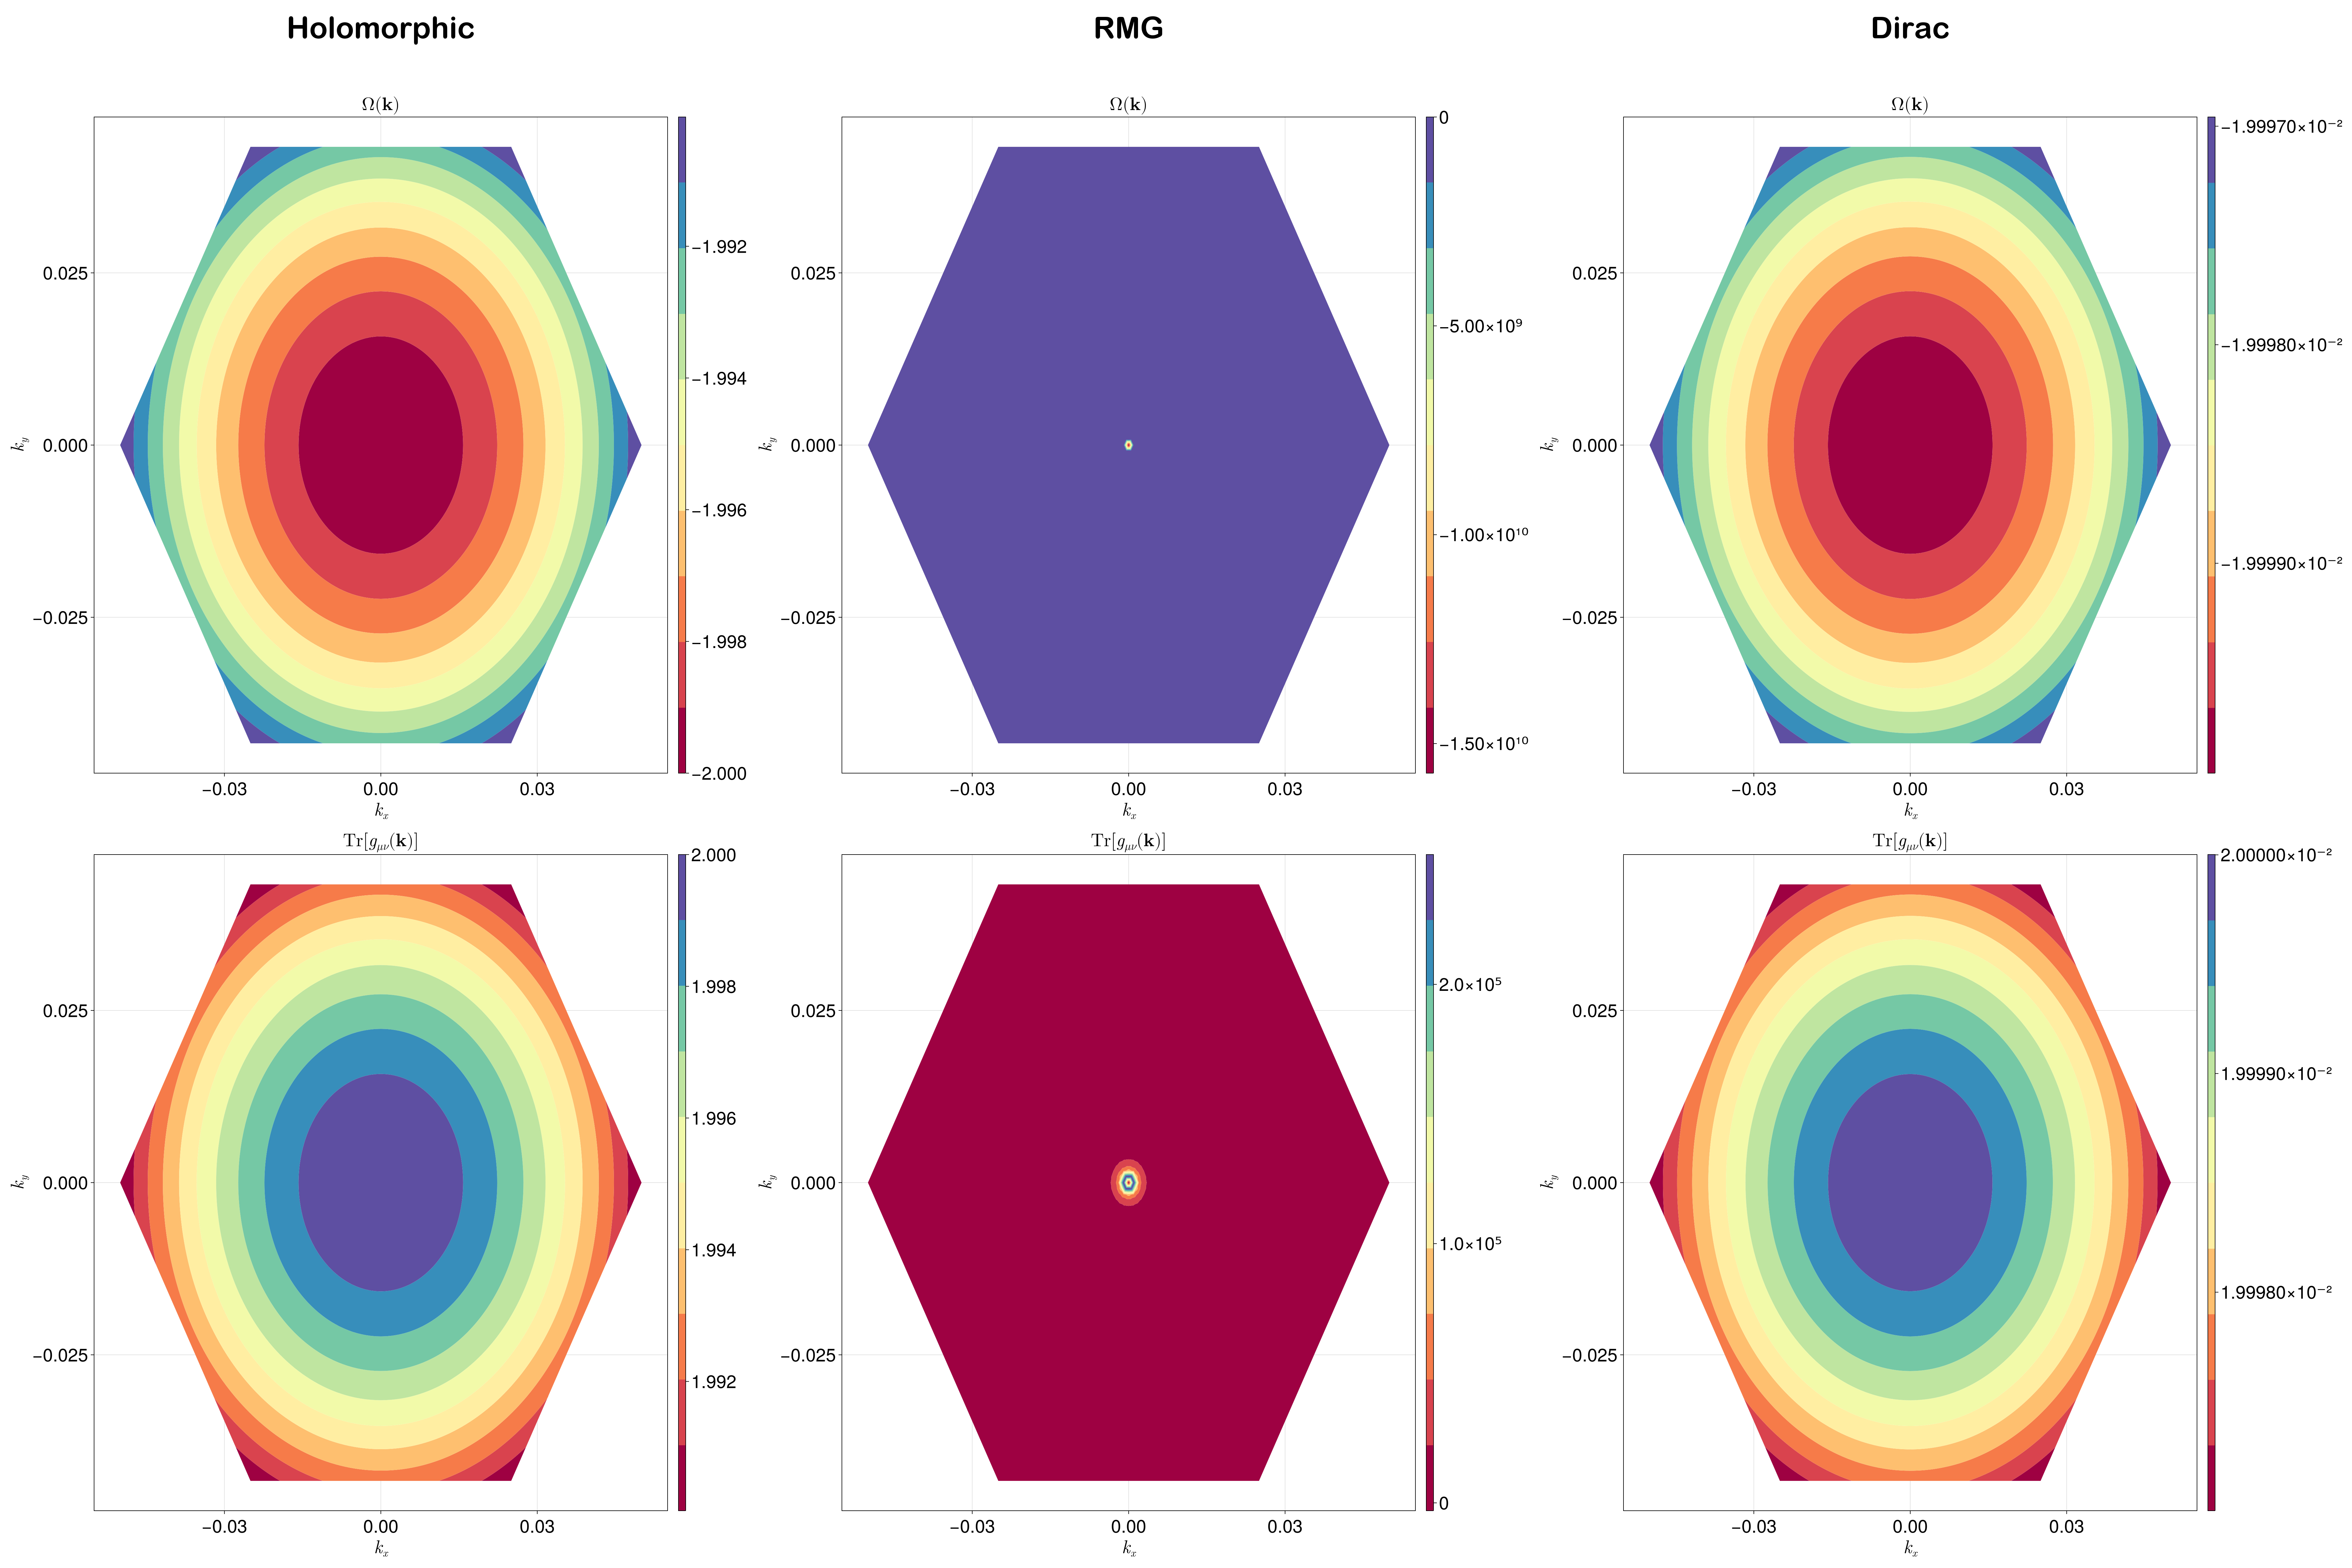

In [18]:
qgt_distro(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m)

<font size="12">3-Patch QGT Distributions</font>

In [19]:
function patch_qgt_distro(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m, m_kappa, vF, delta, alpha)
    grid = make_hex([10^(-16), 10^(-16)], w / 2, w / 2 / pd)

    # holomorphic spinors
    holo_spacing = 10^(-2) * (w / 2 / pd)

    fig = Figure(size=(2600, 1500), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    curvatures = holo_patch_bc(grid, holo_spacing, Nl, m_kappa, vF, delta, alpha)
    g_metric = holo_patch_qm(grid, holo_spacing, Nl, m_kappa, vF, delta, alpha)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 1], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[2, 1], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 2], tr3)

    # ax3 = Axis(fig[3, 1], title = L"\text{Det}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    # tricontourf!(ax3, grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # cb3 = Colorbar(fig[3, 2], tr3)

    major_ax1 = Axis(fig[:, 1], title = "Holomorphic", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    
    # Dirac spinor
    curvatures = dirac_patch_bc(grid, holo_spacing, v, m, index, m_kappa, vF, delta, alpha)
    g_metric = dirac_patch_qm(grid, holo_spacing, v, m, index, m_kappa, vF, delta, alpha)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 3], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 4], tr1)

    ax2 = Axis(fig[2, 3], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 4], tr3)

    # ax3 = Axis(fig[3, 1], title = L"\text{Det}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    # tricontourf!(ax3, grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # cb3 = Colorbar(fig[3, 2], tr3)

    major_ax1 = Axis(fig[:, 3], title = "Dirac", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)


    # RMG spinor
    curvatures = rmg_patch_bc(grid, holo_spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)
    g_metric = rmg_patch_qm(grid, holo_spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)
    trace_metric = g_metric[1, :] .+ g_metric[4, :]
    # det_metric = g_metric[1, :] .* g_metric[4, :] .- g_metric[2, :] .* g_metric[3, :]

    ax1 = Axis(fig[1, 5], title = L"\Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 6], tr1)

    ax2 = Axis(fig[2, 5], title = L"\text{Tr}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    X, ax2, tr3 = tricontourf(grid[:, 1], grid[:, 2], trace_metric, colormap = :Spectral)
    cb3 = Colorbar(fig[2, 6], tr3)

    # ax3 = Axis(fig[3, 1], title = L"\text{Det}[g_{\mu \nu} (\textbf{k})]", xlabel = L"k_x", ylabel = L"k_y")
    # tricontourf!(ax3, grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # X, ax3, tr3 = tricontourf(grid[:, 1], grid[:, 2], det_metric, colormap = :Spectral)
    # cb3 = Colorbar(fig[3, 2], tr3)

    major_ax1 = Axis(fig[:, 5], title = "RMG", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)


    fig
end

patch_qgt_distro (generic function with 1 method)

In [20]:
alpha = 5 * exp(5 * pi/6 * im)

-4.330127018922194 + 2.4999999999999996im

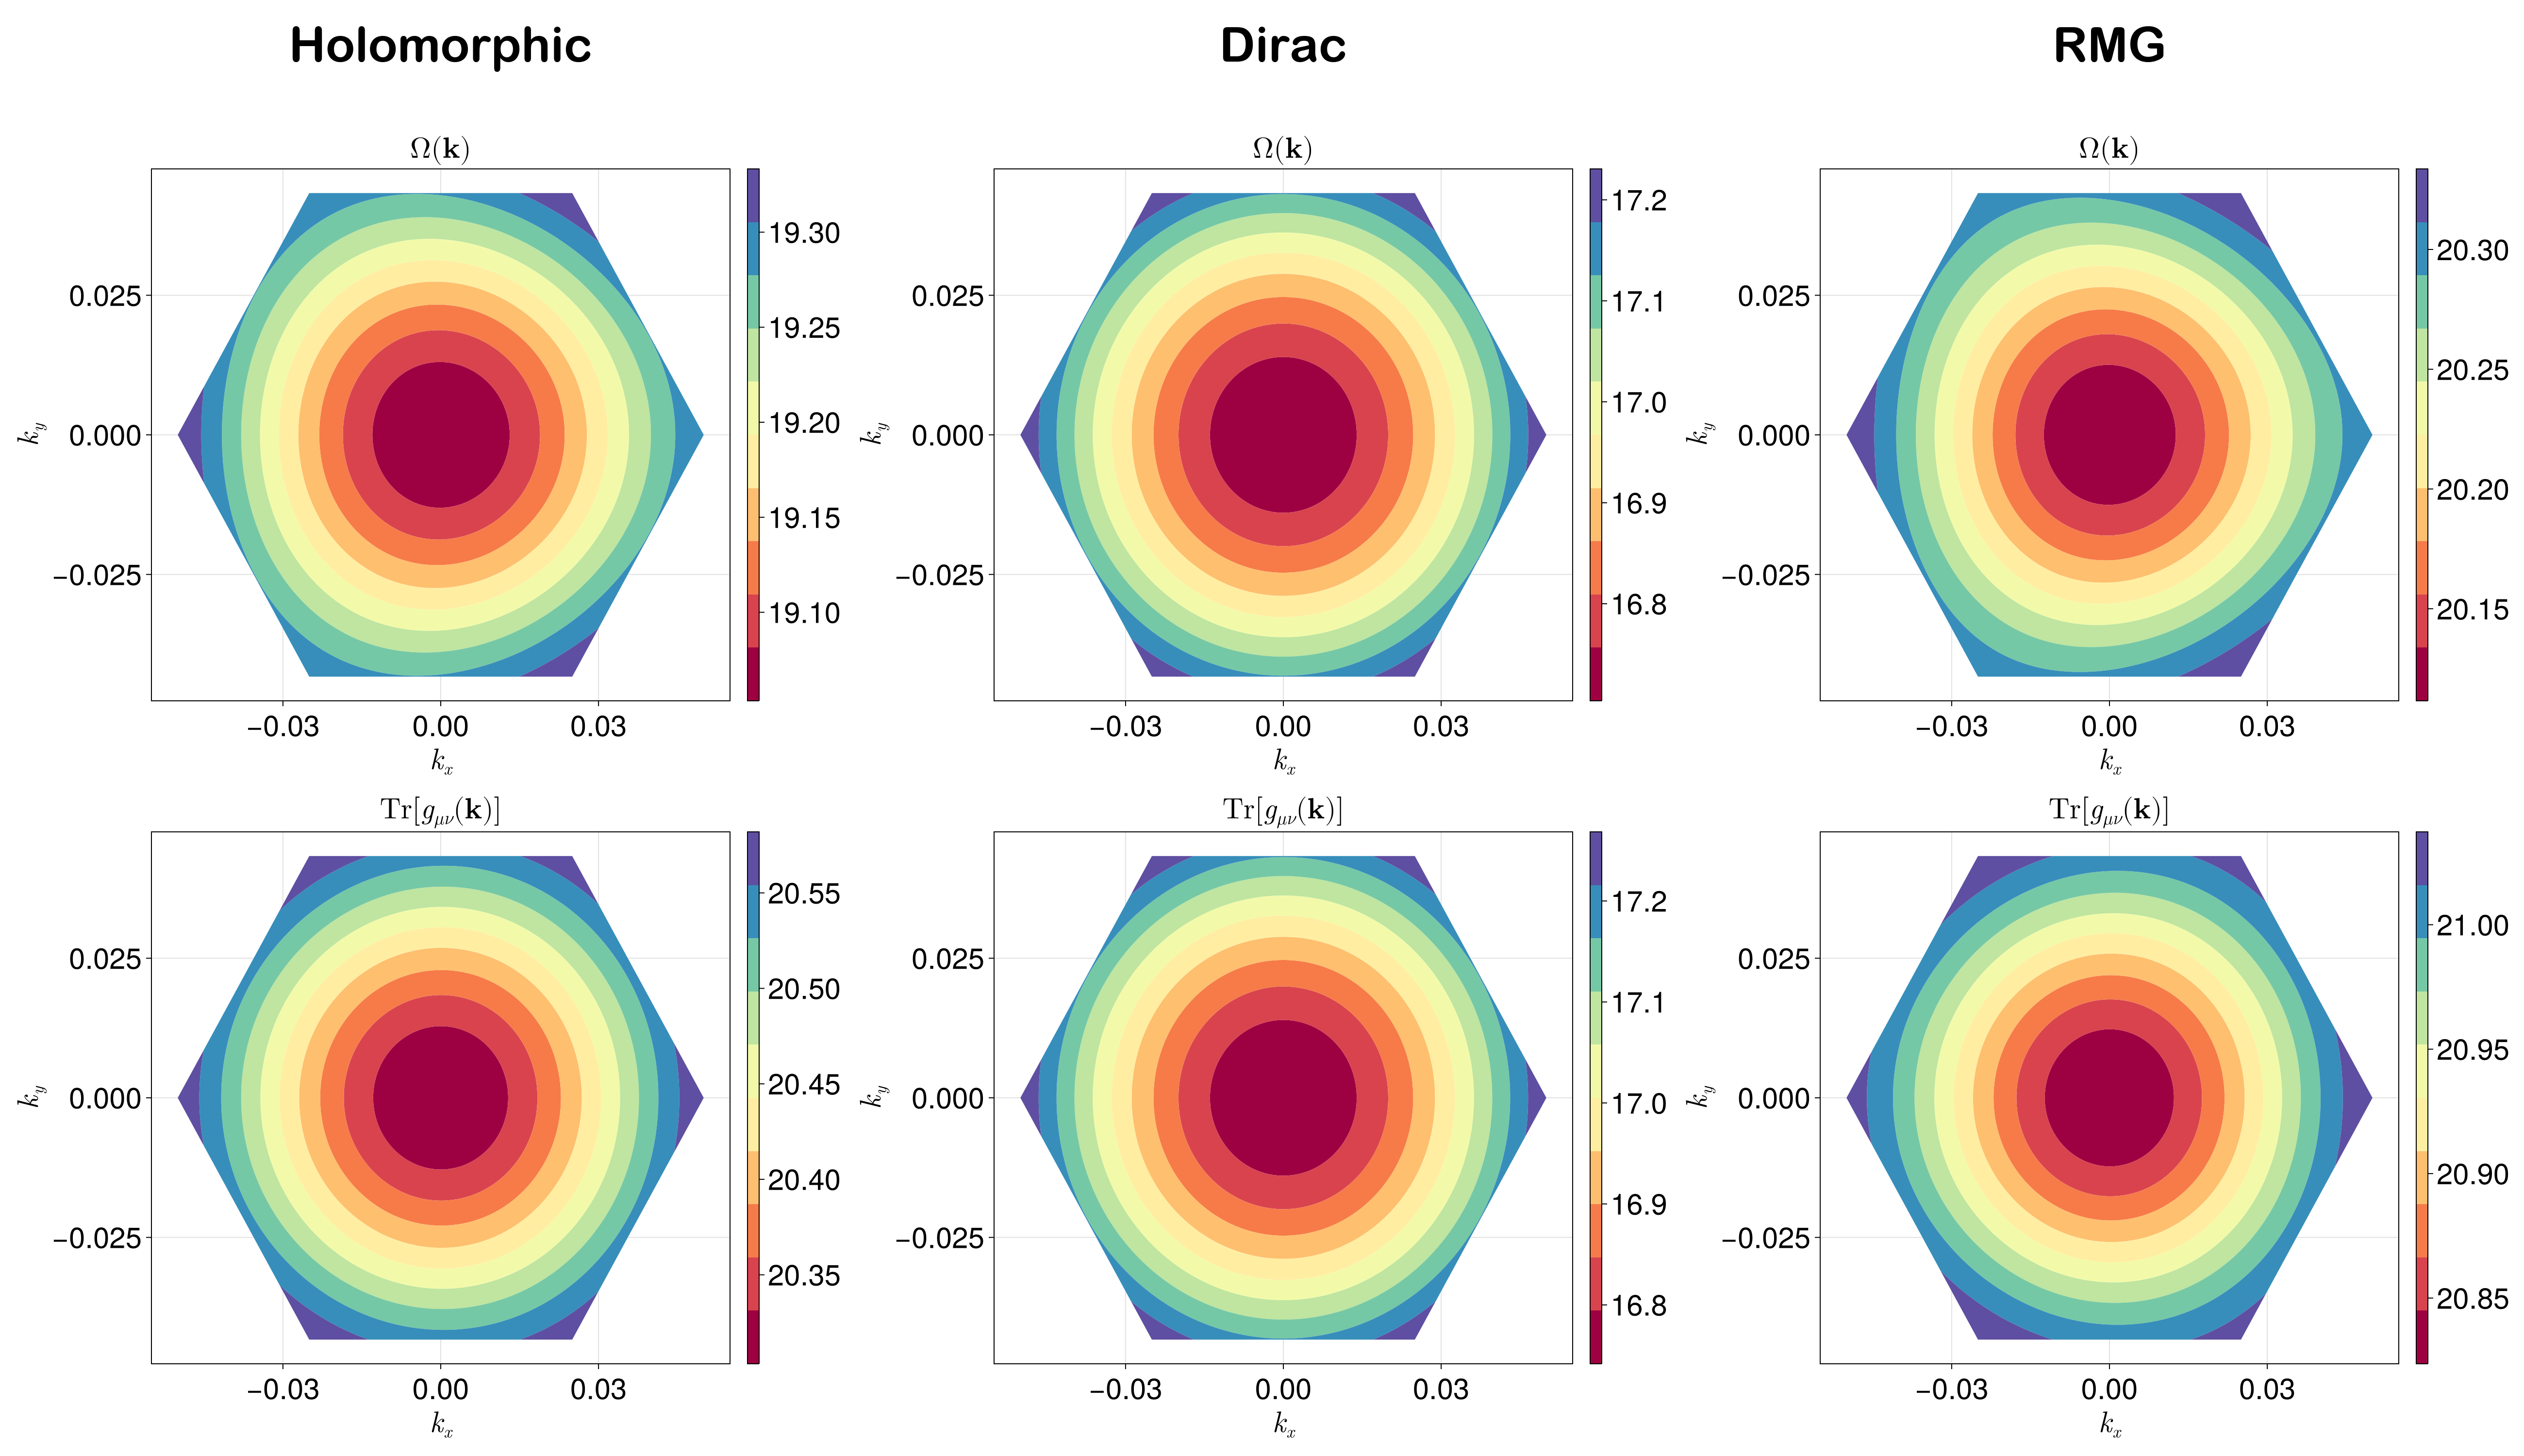

In [21]:
patch_qgt_distro(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m, m_kappa, vF, delta, alpha)

In [29]:
function theta_geo(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m, alpha, delta, m_kappa)
    n_pts = 10^3
    angles = range(-pi, pi, n_pts)
    spinor_labels = ["Holomorphic", "RMG", "Dirac"]
    geometric_quants = Array{Float64}(undef, length(spinor_labels), 3, n_pts)

    p = 10^(-2)
    P = Figure(size=(1600, 800), fontsize=30, fonts = (; regular = "italic", weird = "bold"))
    for i in 1:n_pts
        # holomorphic spinors
        holo_s = 10^(-2) * (w / 2 / pd)
        theta = angles[i]
        x = p * cos(theta)
        y = p * sin(theta)
        grid = reshape([x, y], (1, 2))

        holo_qm = holo_patch_qm(grid, holo_s, Nl, m_kappa, 0, delta, alpha)
        geometric_quants[1, 1, i] = holo_patch_bc(grid, holo_s, Nl, m_kappa, 0, delta, alpha)[1]
        geometric_quants[1, 2, i] = holo_qm[1, 1] + holo_qm[4, 1]
    end

    ax1 = Axis(P[1, 1], xlabel = L"\theta", ylabel = L"\Omega(0, 0)", title = L"\theta \text{ vs } \Omega (\textbf{k})", 
    titlefont = :regular, titlegap = 20)
    lines!(ax1, angles, geometric_quants[1, 1, :], label = "BC")
    ax2 = Axis(P[1, 2], xlabel = L"\theta", ylabel = L"g_{\mu \nu}", title = L"\theta \text{ vs } g_{\mu \nu} (\textbf{k})", 
    titlefont = :regular, titlegap = 20)
    lines!(ax2, angles, geometric_quants[1, 2, :], label = "g")
    P
end

theta_geo (generic function with 1 method)

In [ ]:
alpha = 5 * exp(5 * pi/6 * im)

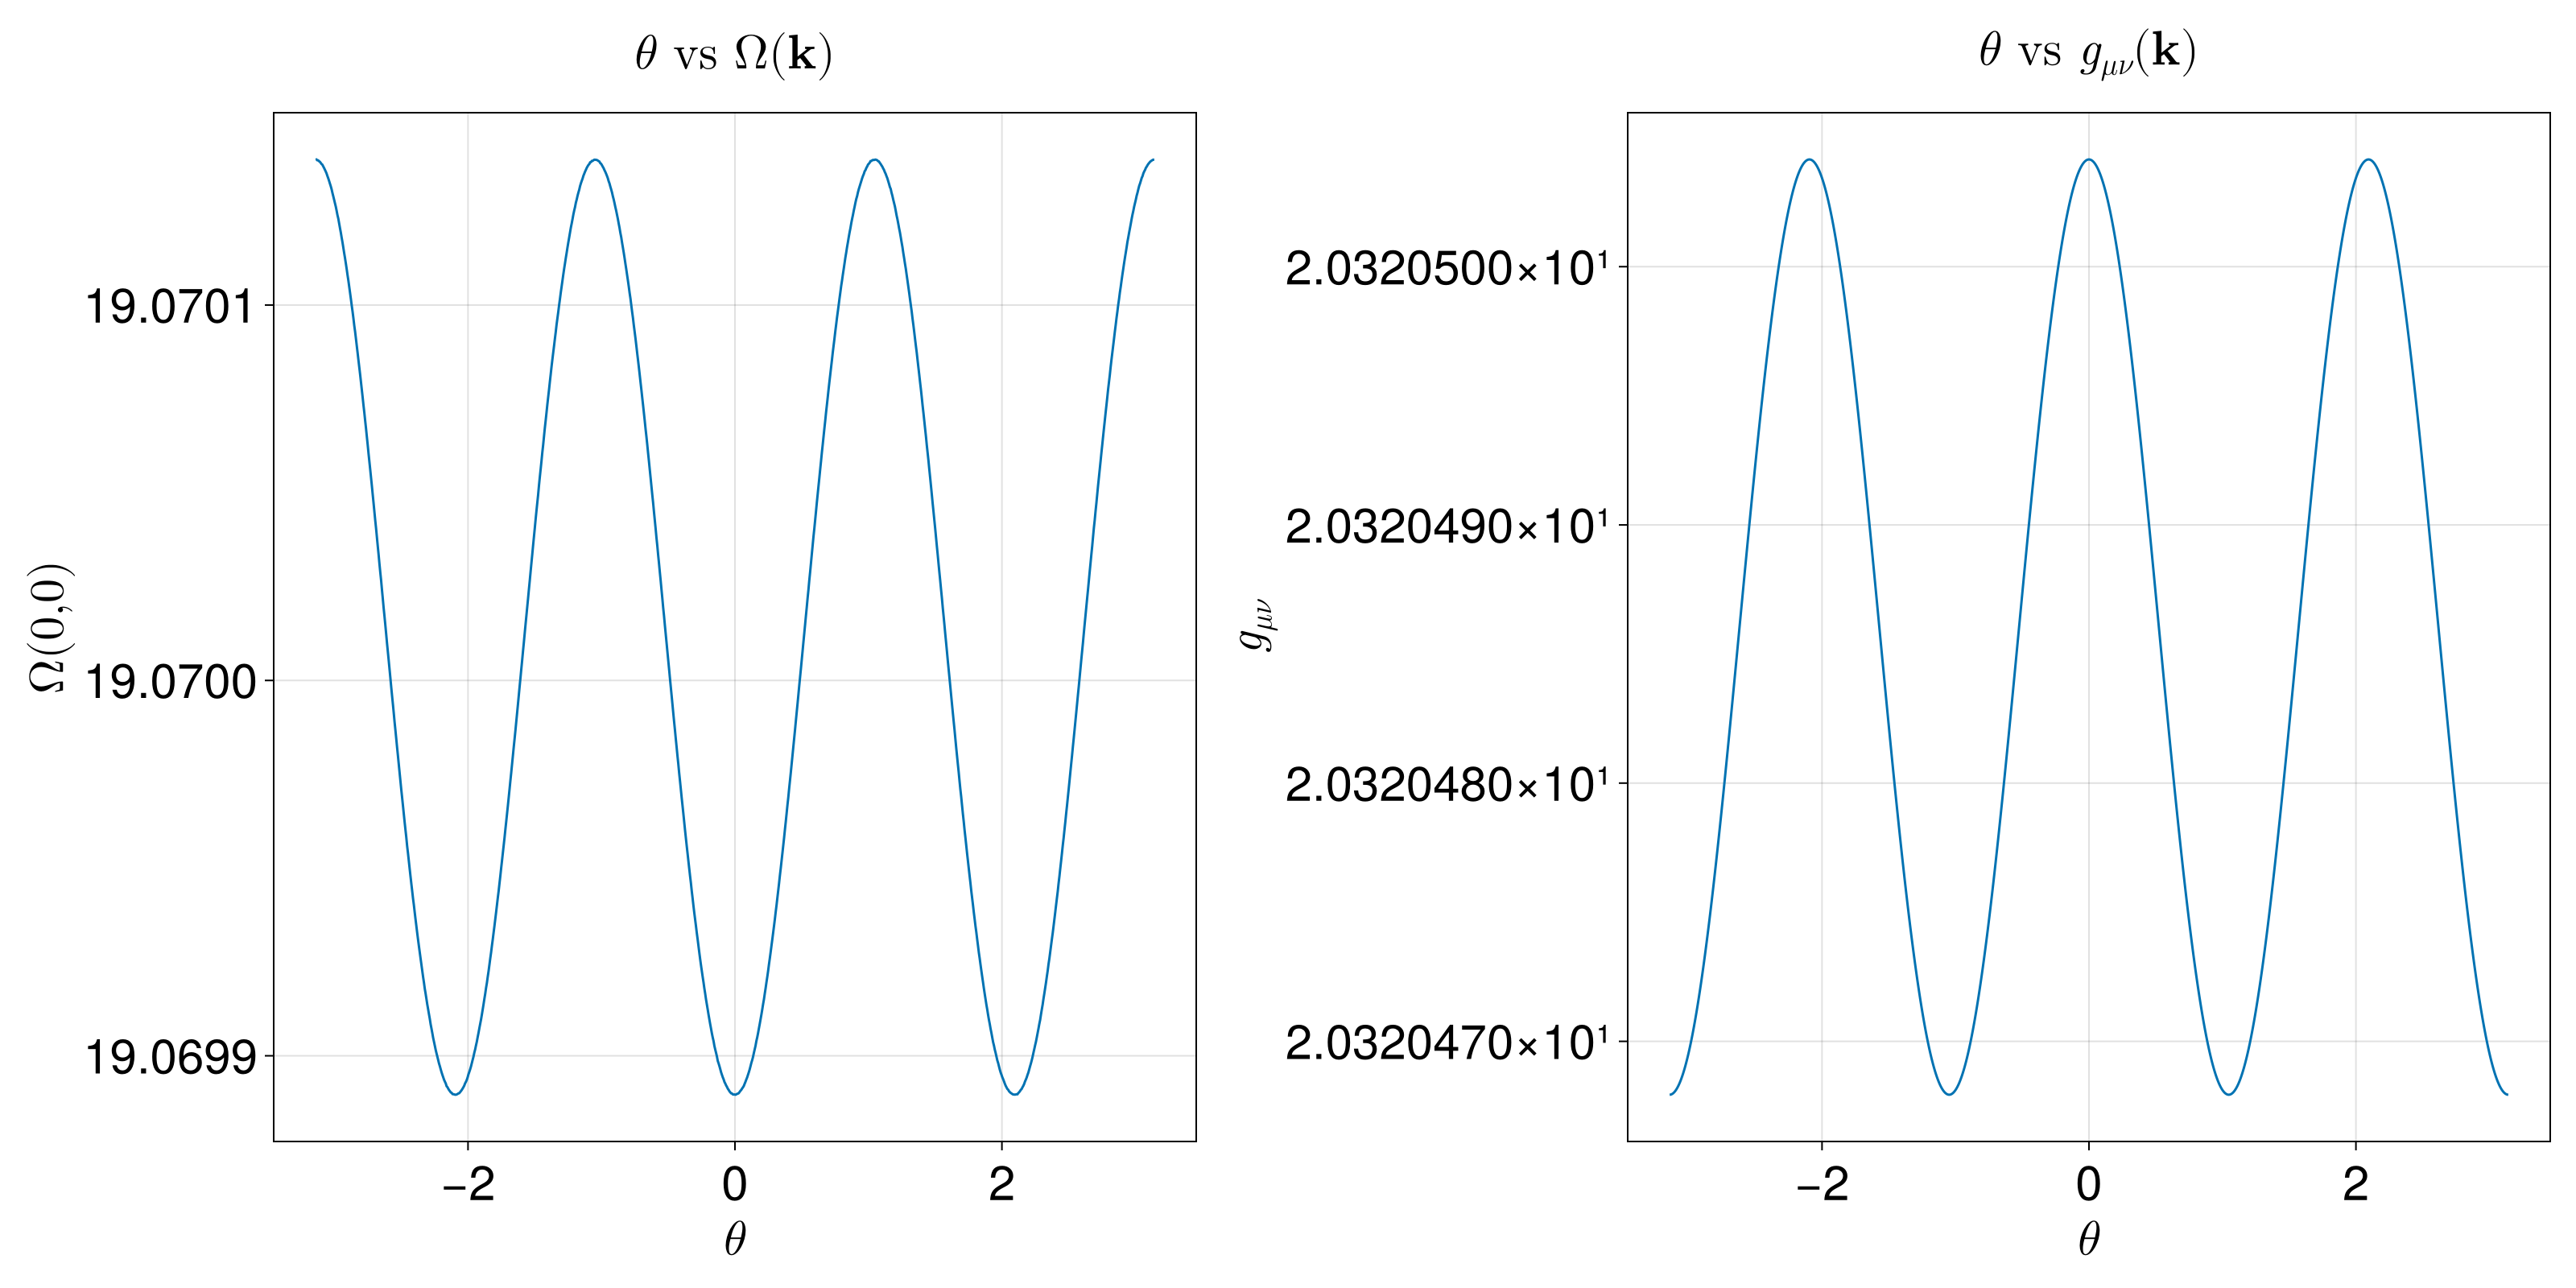

In [30]:
theta_geo(w, pd, a, uD, t0, t1, t2, t3, t4, Nl, index, v, m, alpha, delta, m_kappa)